In [1]:
import utils
import pandas as pd
from prediction import analyze_data, plot_analysis, count_data

In [2]:
device = utils.getting_device()

train_df =pd.read_csv('data/train_30303.csv')
test_df = pd.read_csv('data/test_17669.csv')
print(train_df.shape, test_df.shape)

device: cuda
(30303, 4) (17669, 4)


## Base: BERT, GPT, CodeBERT, RoBERTa

In [3]:
model = 'bert'
train_file = 'out/'+model+'_30303.pt'
test_file = 'out/'+model+'_17669.pt'
bert_dic_lang, bert_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.50 seconds, Data predicted: 0
Time elapsed: 238.35 seconds, Data predicted: 5000
Time elapsed: 243.48 seconds, Data predicted: 10000
Time elapsed: 246.91 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 52.06%
Accuracy of Programming Task prediction: 16.10%


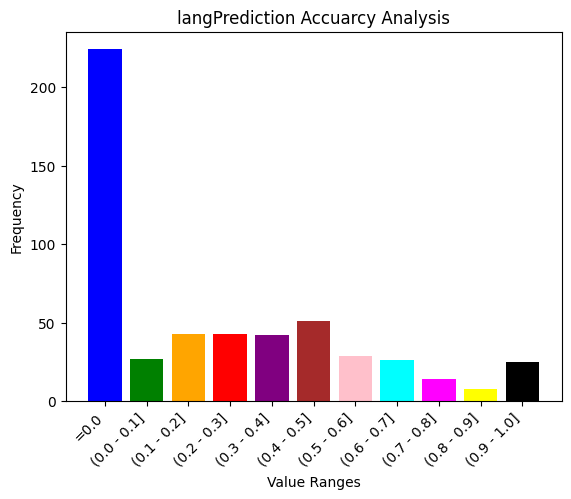

In [4]:
counts = count_data(bert_dic_lang)
plot_analysis(counts, model)

In [5]:
model = 'gpt'
train_file = 'out/'+model+'_30303.pt'
test_file = 'out/'+model+'_17669.pt'
gpt_dic_lang, gpt_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.43 seconds, Data predicted: 0
Time elapsed: 241.96 seconds, Data predicted: 5000
Time elapsed: 244.93 seconds, Data predicted: 10000
Time elapsed: 266.84 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 39.60%
Accuracy of Programming Task prediction: 6.54%


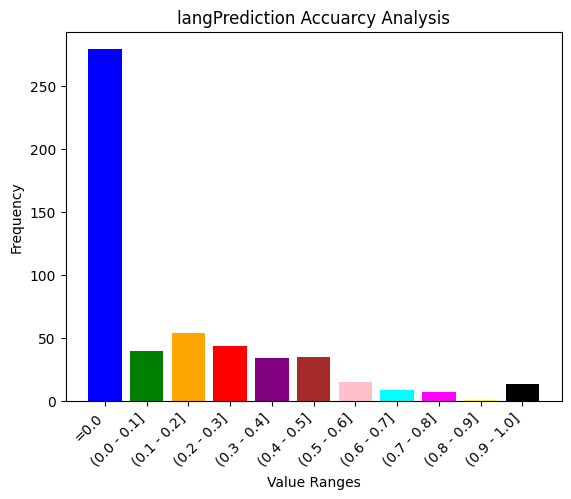

In [6]:
counts = count_data(gpt_dic_lang)
plot_analysis(counts, model)

In [7]:
model = 'codegpt'
train_file = 'out/'+model+'_30303.pt'
test_file = 'out/'+model+'_17669.pt'
codegpt_dic_lang, codegpt_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.50 seconds, Data predicted: 0
Time elapsed: 241.94 seconds, Data predicted: 5000
Time elapsed: 248.53 seconds, Data predicted: 10000
Time elapsed: 252.17 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 60.65%
Accuracy of Programming Task prediction: 17.17%


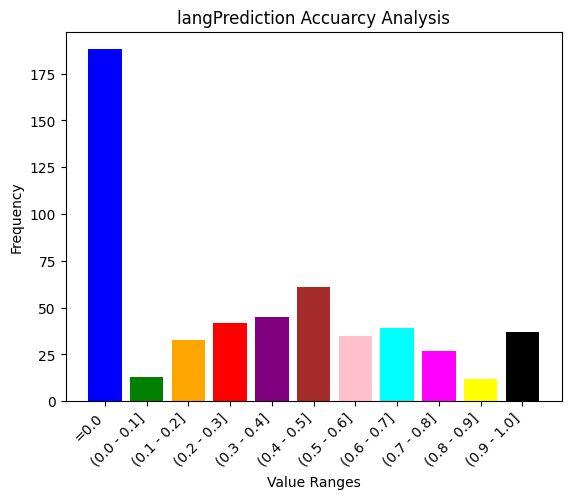

In [8]:
counts = count_data(codegpt_dic_lang)
plot_analysis(counts, model)

In [9]:
model = 'codebert'
train_file = 'out/'+model+'_30303.pt'
test_file = 'out/'+model+'_17669.pt'
codebert_dic_lang, codebert_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.48 seconds, Data predicted: 0
Time elapsed: 244.37 seconds, Data predicted: 5000
Time elapsed: 255.96 seconds, Data predicted: 10000
Time elapsed: 258.26 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 51.37%
Accuracy of Programming Task prediction: 10.22%


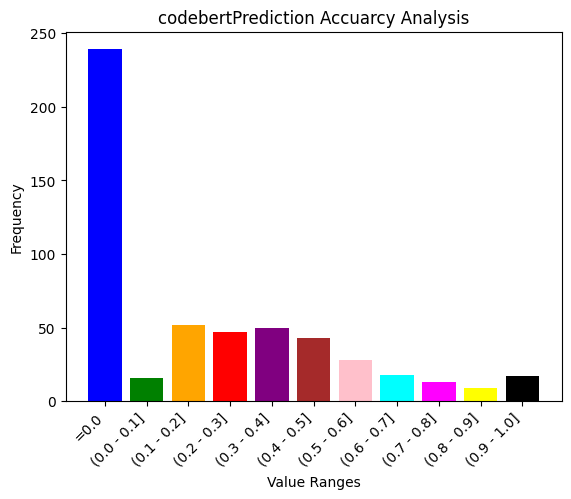

In [10]:
counts = count_data(codebert_dic_lang)
plot_analysis(counts, model)

In [11]:
model = 'roberta'
train_file = 'out/'+model+'_30303.pt'
test_file = 'out/'+model+'_17669.pt'
roberta_dic_lang, roberta_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.45 seconds, Data predicted: 0
Time elapsed: 242.94 seconds, Data predicted: 5000
Time elapsed: 241.66 seconds, Data predicted: 10000
Time elapsed: 240.45 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 51.14%
Accuracy of Programming Task prediction: 13.00%


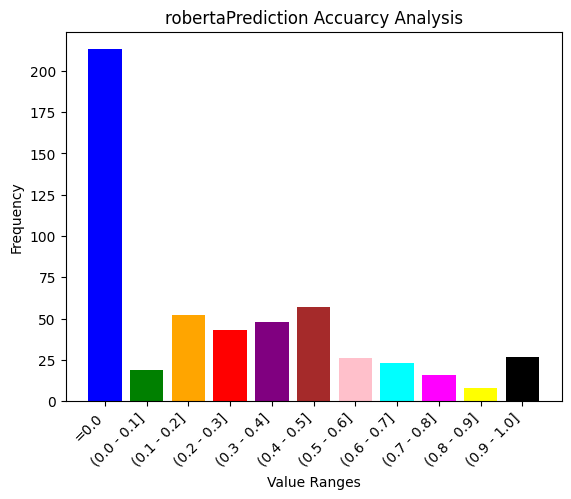

In [13]:
counts = count_data(roberta_dic_lang)
plot_analysis(counts, model)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def multi_count(data):
    bins = {'=0.0': 0, '(0.0 - 0.1]': 0, '(0.1 - 0.2]': 0, '(0.2 - 0.3]': 0, '(0.3 - 0.4]': 0,
            '(0.4 - 0.5]': 0, '(0.5 - 0.6]': 0, '(0.6 - 0.7]': 0, '(0.7 - 0.8]': 0, '(0.8 - 0.9]': 0, '(0.9 - 1.0]': 0}
    
    for value in data.values():
        if value == 0.0:
            bins['=0.0'] += 1
        elif 0.0 < value <= 0.1:
            bins['(0.0 - 0.1]'] += 1
        elif 0.1 < value <= 0.2:
            bins['(0.1 - 0.2]'] += 1
        elif 0.2 < value <= 0.3:
            bins['(0.2 - 0.3]'] += 1
        elif 0.3 < value <= 0.4:
            bins['(0.3 - 0.4]'] += 1
        elif 0.4 < value <= 0.5:
            bins['(0.4 - 0.5]'] += 1
        elif 0.5 < value <= 0.6:
            bins['(0.5 - 0.6]'] += 1
        elif 0.6 < value <= 0.7:
            bins['(0.6 - 0.7]'] += 1
        elif 0.7 < value <= 0.8:
            bins['(0.7 - 0.8]'] += 1
        elif 0.8 < value <= 0.9:
            bins['(0.8 - 0.9]'] += 1
        elif 0.9 < value <= 1.0:
            bins['(0.9 - 1.0]'] += 1
    
    return bins

def plot_multi_count(analysis, data_labels):
    labels = analysis[0].keys()
    width = 0.1
    fig, ax = plt.subplots()
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'yellow', 'black']
    x = np.arange(len(labels))

    for i, (bins, label) in enumerate(zip(analysis, data_labels)):
        counts = list(bins.values())
        ax.bar(x + i * width, counts, width=width, color=colors[i], label=label)

    ax.set_xlabel('Value Ranges')
    ax.set_ylabel('Frequency')
    ax.set_title('Data Analysis')
    ax.set_xticks(x + width * (len(analysis) - 1) / 2)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.xticks(rotation=45, ha='right')
    plt.show()



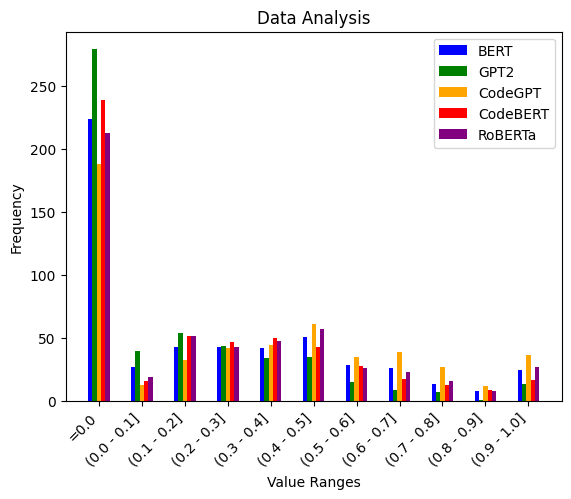

In [15]:
datasets = [bert_dic_lang, gpt_dic_lang, codegpt_dic_lang, codebert_dic_lang, roberta_dic_lang]
data_labels = ['BERT', 'GPT2' , 'CodeGPT' , 'CodeBERT' , 'RoBERTa']

counts = [multi_count(data) for data in datasets]
plot_multi_count(counts, data_labels)


## Training

In [4]:
model = 'epoch4_roberta'

analyze_data(model, train_df, test_df, device, mode = 'emb')

out/epoch4_roberta_30303.pt
Model vertified: epoch4_roberta
Starting extract embeddings......
Time elapsed: 2985.74 seconds, Data processed:10000
Time elapsed: 1970.07 seconds, Data processed:20000
Time elapsed: 2473.00 seconds, Data processed:30000
End of extracting...Number of record: torch.Size([30303, 768])
out/epoch4_roberta_17669.pt
Model vertified: epoch4_roberta
Starting extract embeddings......
Time elapsed: 4002.98 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([17669, 768])
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.61 seconds, Data predicted: 0
Time elapsed: 222.42 seconds, Data predicted: 5000
Time elapsed: 222.10 seconds, Data predicted: 10000
Time elapsed: 225.15 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 59.35%
Accuracy of Programmi

In [7]:
model = 'epoch1_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')

out/epoch1_codebert_30303.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 2384.81 seconds, Data processed:10000
Time elapsed: 2737.07 seconds, Data processed:20000
Time elapsed: 3175.02 seconds, Data processed:30000
End of extracting...Number of record: torch.Size([30303, 768])
out/epoch1_codebert_17669.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 3160.35 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([17669, 768])
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.46 seconds, Data predicted: 0
Time elapsed: 217.80 seconds, Data predicted: 5000
Time elapsed: 218.54 seconds, Data predicted: 10000
Time elapsed: 223.19 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 60.71%
Accuracy of Programming T

In [6]:
model = 'epoch2_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')

out/epoch2_codebert_30303.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 2850.23 seconds, Data processed:10000
Time elapsed: 2774.67 seconds, Data processed:20000
Time elapsed: 3174.80 seconds, Data processed:30000
End of extracting...Number of record: torch.Size([30303, 768])
out/epoch2_codebert_17669.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 3161.32 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([17669, 768])
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.43 seconds, Data predicted: 0
Time elapsed: 223.19 seconds, Data predicted: 5000
Time elapsed: 224.69 seconds, Data predicted: 10000
Time elapsed: 223.41 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 61.06%
Accuracy of Programming T

In [5]:
model = 'epoch3_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')

out/epoch3_codebert_30303.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 1473.62 seconds, Data processed:10000
Time elapsed: 2588.61 seconds, Data processed:20000
Time elapsed: 3137.25 seconds, Data processed:30000
End of extracting...Number of record: torch.Size([30303, 768])
out/epoch3_codebert_17669.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 3180.45 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([17669, 768])
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.43 seconds, Data predicted: 0
Time elapsed: 219.28 seconds, Data predicted: 5000
Time elapsed: 222.58 seconds, Data predicted: 10000
Time elapsed: 221.29 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 62.93%
Accuracy of Programming T

In [4]:
model = 'epoch4_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')

out/epoch4_codebert_30303.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 2791.22 seconds, Data processed:10000
Time elapsed: 2709.19 seconds, Data processed:20000
Time elapsed: 1774.08 seconds, Data processed:30000
End of extracting...Number of record: torch.Size([30303, 768])
out/epoch4_codebert_17669.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 1630.40 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([17669, 768])
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.32 seconds, Data predicted: 0
Time elapsed: 156.59 seconds, Data predicted: 5000
Time elapsed: 154.25 seconds, Data predicted: 10000
Time elapsed: 152.78 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 63.73%
Accuracy of Programming T

In [3]:
model = 'epoch5_codebert'

analyze_data(model, train_df, test_df, device, mode = 'emb')

out/epoch5_codebert_30303.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 2883.59 seconds, Data processed:10000
Time elapsed: 2742.88 seconds, Data processed:20000
Time elapsed: 3129.76 seconds, Data processed:30000
End of extracting...Number of record: torch.Size([30303, 768])
out/epoch5_codebert_17669.pt
Model vertified: saved model
Starting extract embeddings......
Time elapsed: 3131.15 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([17669, 768])
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Original train count: 30303, test count: 17669.
After mapping: train count: 30303, test count: 17669.
Time elapsed: 0.77 seconds, Data predicted: 0
Time elapsed: 216.71 seconds, Data predicted: 5000
Time elapsed: 216.09 seconds, Data predicted: 10000
Time elapsed: 218.19 seconds, Data predicted: 15000
Accuracy of Programming Language prediction: 63.26%
Accuracy of Programming T